In [1]:
data_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics/data/single-cell/exploratory"
working_dir = "/data/projects/dschaub/ANCA-GN_transcriptomics"

In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
os.chdir(working_dir)

import yaml
import anndata as ad
import matplotlib.pyplot as plt
import mudata as md
import numpy as np
import scanpy as sc
import matplotlib as mpl

from utils.utils import *
from utils.plotting import *

sc.settings.verbosity = 0
sc.set_figure_params(dpi=80)
sns.set(style="white")

Global seed set to 0
/opt/conda/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/opt/conda/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [3]:
path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_CD8Teff_TotalVI.h5mu"
)
mudata = md.read_h5mu(path)
mod_rna = mudata.mod["rna"]
mod_cite = mudata.mod["cite"]
mudata

MuData object with n_obs × n_vars = 6795 × 14844
  2 modalities
    rna:	6795 x 14638
      obs:	'patient', 'sample', 'tissue', 'cell_type_yu', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6', 'leiden_1.7', 'leiden_1.8', 'leiden_1.9', 'cell_type', 'leiden_2.0'
      var:	'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'cell_type_yu_colors', 'dea_leiden_1.0', 'leiden', 'leiden_0.3_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.7_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'leiden_1.0_colors', 'leiden_1.1_colors', 'leiden_1.2_colors', 'leiden_1.3_colors', 'leiden_1.4_colors', 'leiden_1.5_colors', 'leiden_1.6_colors', 'leiden_1.7_colors', 'leiden_1.8_colors', 'leiden_1.9_colors', 'leiden_2.0_colors', 'log1p', 'neighbors', 'patient_colors', 'sample_colors', 'tissue_colors', 'umap'
      obsm:	'X_harmony', 'X_totalvi', 'X_umap'
      layers:	'counts', 'log1p'
      obsp:	'connectivities', 'distances'
    cite:	6795 x 206
      obs:	'patient', 'sample', 'tissue', 'cell_type_yu', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden_1.0'
      var:	'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
      obsm:	'X_umap'
      layers:	'clr', 'counts'

In [4]:
mod_rna.obs

,patient,sample,tissue,cell_type_yu,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,...,leiden_1.2,leiden_1.3,leiden_1.4,leiden_1.5,leiden_1.6,leiden_1.7,leiden_1.8,leiden_1.9,cell_type,leiden_2.0
E016K_AAAGATGCACATCCAA,E016,E016K,K,CD8 EM/RM,750,748,1545.0,46.0,2.977346,367.0,...,4,3,3,2,8,18,22,17,CD8+ EM/RM,25
E016K_AAAGATGTCCTTCAAT,E016,E016K,K,CD8 EM/RM,657,655,1450.0,29.0,2.000000,384.0,...,11,12,9,12,8,9,14,7,CD8+ EM/RM,16
E016K_AACCATGGTGACTCAT,E016,E016K,K,CD8 EM/RM,887,883,2064.0,58.0,2.810078,552.0,...,1,2,2,3,2,1,1,2,CD8+ EM/RM,0
E016K_AACCGCGGTTACCAGT,E016,E016K,K,CD8 EM/RM,818,812,2050.0,67.0,3.268293,564.0,...,2,1,1,1,0,0,0,1,CD8+ EM/RM,1
E016K_AACGTTGAGCTGAAAT,E016,E016K,K,CD8 EM/RM,525,525,1100.0,26.0,2.363636,208.0,...,7,4,6,15,10,14,11,20,CD8+ EM/RM,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E015B_TTAGGACAGGGCTTGA-1,E015,E015B,B,NKT/CTL,1601,1599,3741.0,65.0,1.737503,1099.0,...,2,1,1,1,0,0,0,1,CD8+ EM/RM,1
E015B_TTCCCAGCACAACGTT-1,E015,E015B,B,CD8 CM/EM,723,722,1311.0,19.0,1.449275,373.0,...,8,6,7,8,6,5,9,8,CD8+ EM/RM,3
E015B_TTGAACGGTACAGTGG-1,E015,E015B,B,CD8 EM/RM,1046,1046,2167.0,16.0,0.738348,632.0,...,10,8,7,11,12,7,7,10,CD8+ EM/RM,7
E015B_TTTCCTCCATAGGATA-1,E015,E015B,B,Treg,2174,2172,5151.0,54.0,1.048340,1156.0,...,14,14,14,16,14,16,15,16,CD8+ EM/RM,21


In [5]:
cluster_key = "leiden_1.0"
get_cluster_names(mod_rna, cluster_key)

"0": "",
"1": "",
"2": "",
"3": "",
"4": "",
"5": "",
"6": "",
"7": "",
"8": "",
"9": "",
"10": "",
"11": "",


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

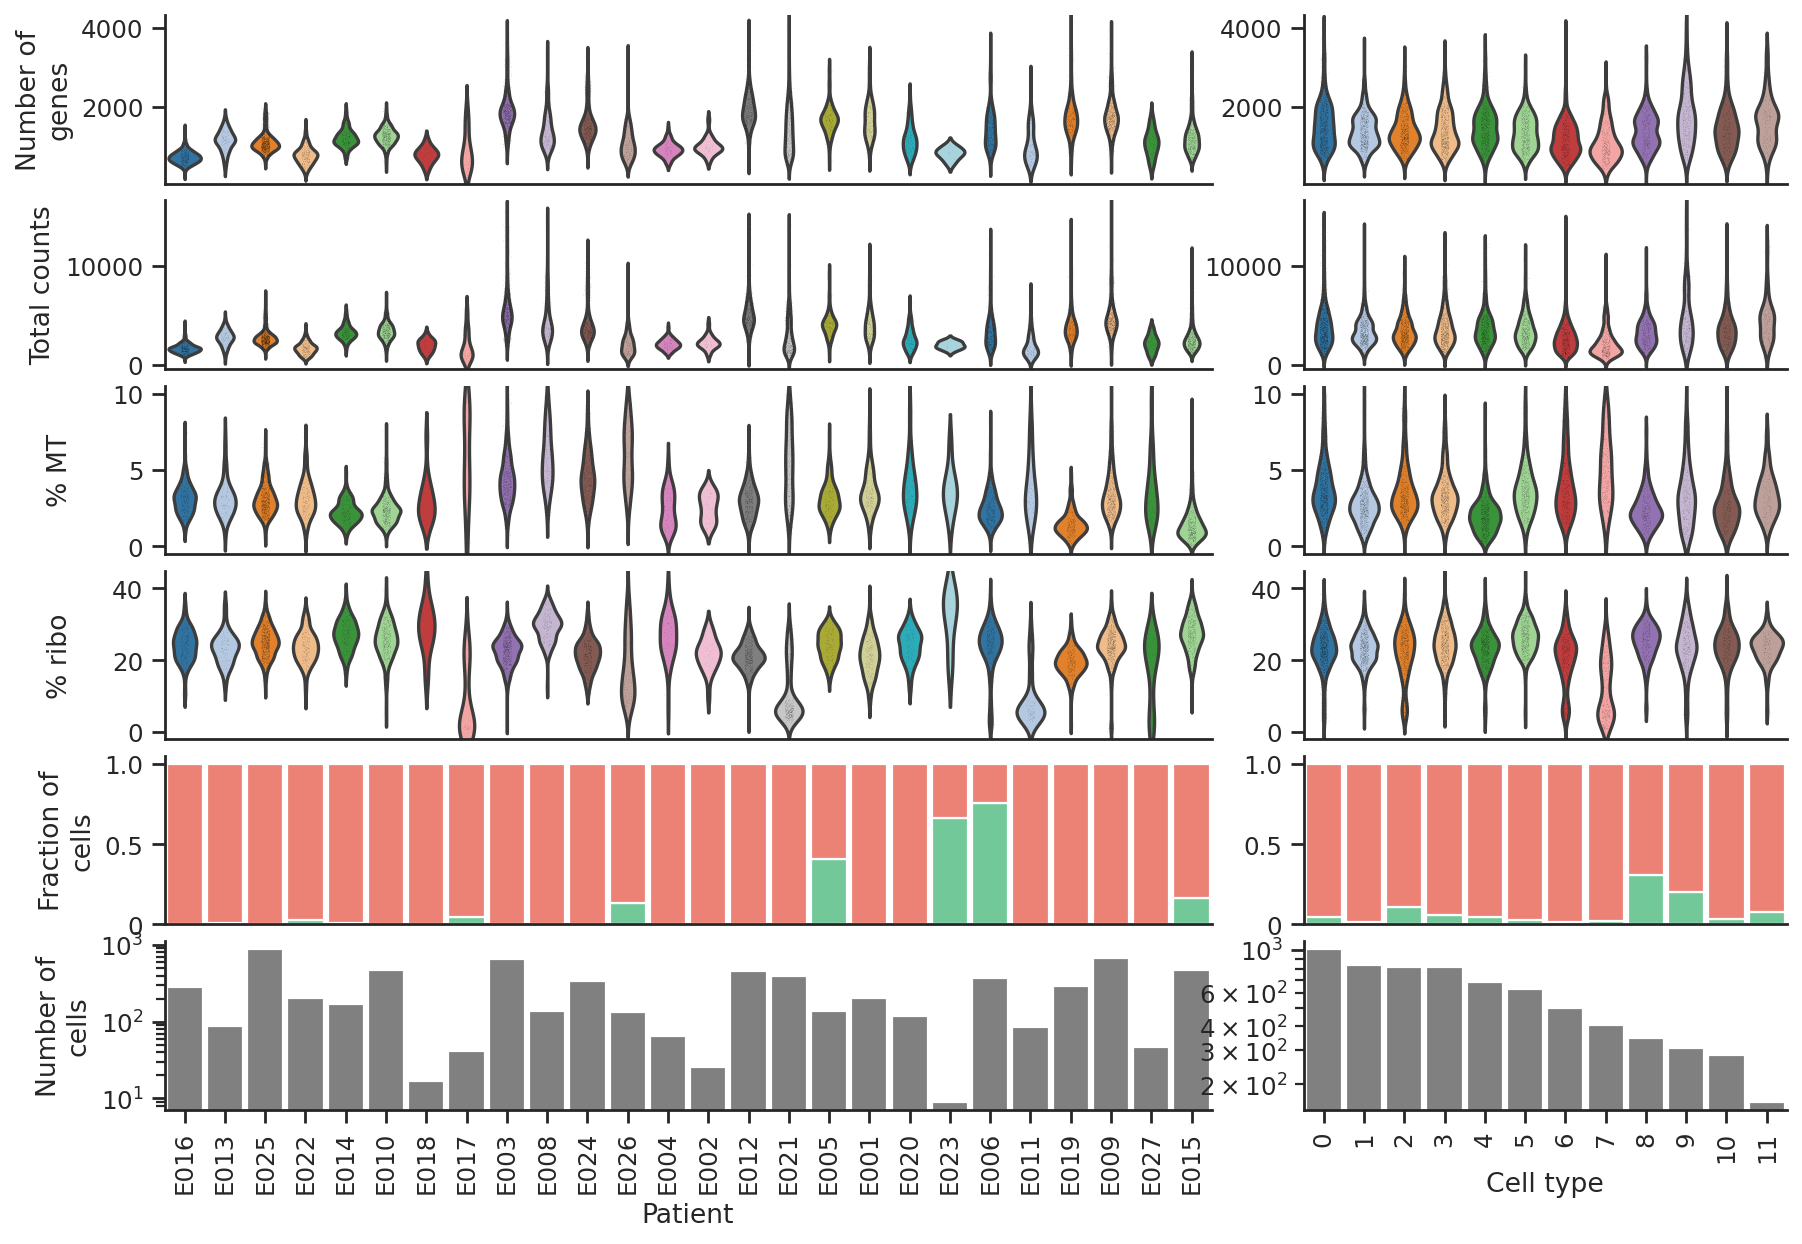

In [6]:
plot_qc(mod_rna, cluster_key)

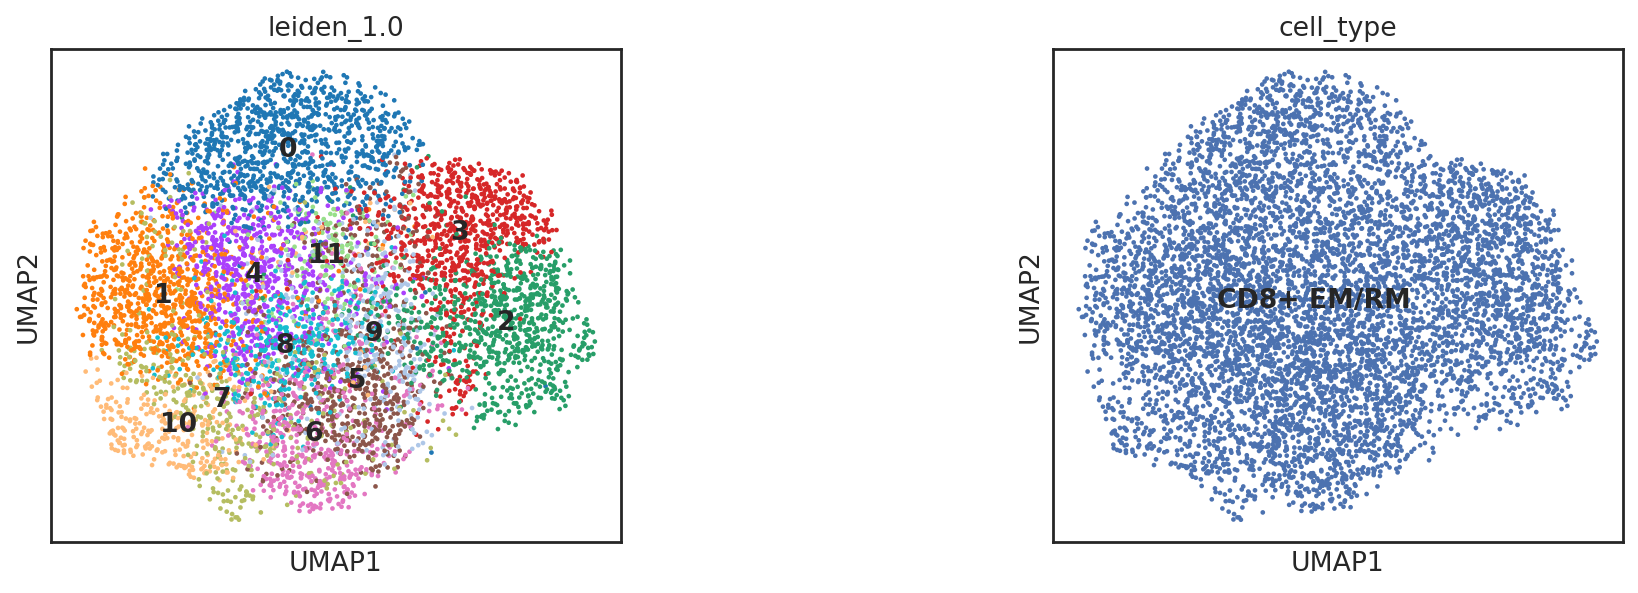

In [7]:
sc.pl.umap(mod_rna, color=[cluster_key, "cell_type"], legend_loc="on data", wspace=0.6)

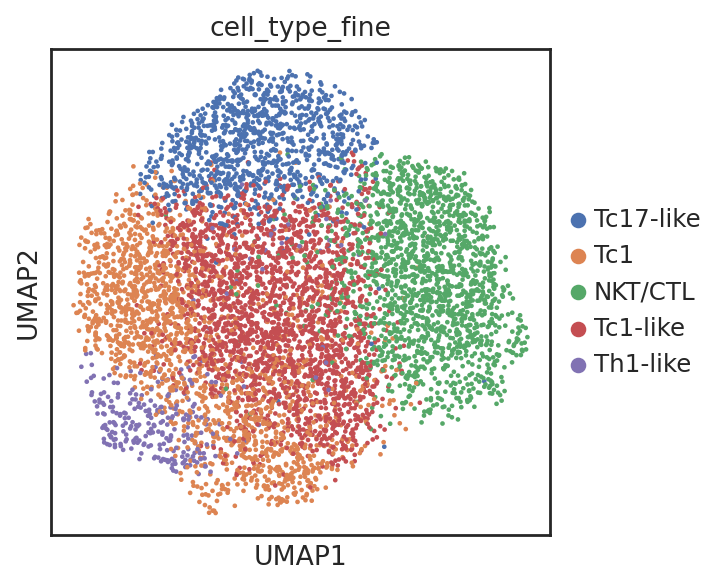

In [8]:
annotations = {
    "0": "Tc17-like",
    "1": "Tc1",
    "2": "NKT/CTL",
    "3": "NKT/CTL",
    "4": "Tc1-like",
    "5": "Tc1-like",  # "CD8+ EM/CM",
    "6": "Tc1",
    "7": "Tc1",
    "8": "Tc1-like",  # "CD8+ EM/CM",
    "9": "Tc1-like",
    "10": "Th1-like",
    "11": "Tc1-like",  # "CD8+ EM/CM",
}

mod_rna.obs["cell_type_fine"] = mod_rna.obs[cluster_key].replace(annotations)
sc.pl.umap(mod_rna, color="cell_type_fine")

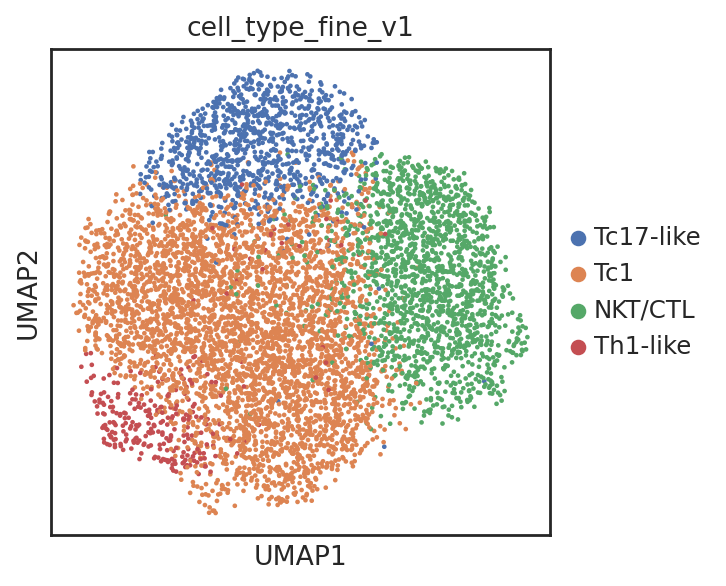

In [9]:
annotations = {
    "0": "Tc17-like",
    "1": "Tc1",
    "2": "NKT/CTL",
    "3": "NKT/CTL",
    "4": "Tc1",
    "5": "Tc1",  # "CD8+ EM/CM",
    "6": "Tc1",
    "7": "Tc1",
    "8": "Tc1",  # "CD8+ EM/CM",
    "9": "Tc1",
    "10": "Th1-like",
    "11": "Tc1",  # "CD8+ EM/CM",
}

mod_rna.obs["cell_type_fine_v1"] = mod_rna.obs[cluster_key].replace(annotations)
sc.pl.umap(mod_rna, color="cell_type_fine_v1")

In [10]:
save_path = os.path.join(
    data_dir, "ANCA_exploratory_27PK27PB_CD8Teff_annotated.h5mu"
)
mudata = md.MuData(
    {
        "rna": mod_rna.copy(),
        "cite": mod_cite.copy(),
    }
)
mudata.write_h5mu(save_path)